# Analysis and plotting the results


In [5]:
# Import the required libraries.
import os
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Ping-Pong part


In [2]:
# Read the data for PingPong
PPBD = pd.read_csv('../data/PingPong_different_amr.csv',            # Blocking Ping-Pong on different nodes.
                   header=None, names=['Repetition', 'Size', 'Time'])
PPBS = pd.read_csv('../data/PingPong_same_amr.csv',                 # Blocking Ping-Pong on same nodes.
                   header=None, names=['Repetition', 'Size', 'Time'])
PPND = pd.read_csv('../data/PingPongNonBlocking_different_amr.csv', # Non-blocking Ping-Pong on different nodes.
                   header=None, names=['Repetition', 'Size', 'Time'])
PPNS = pd.read_csv('../data/PingPongNonBlocking_same_amr.csv',      # Non-blocking Ping-Pong on same nodes.
                   header=None, names=['Repetition', 'Size', 'Time'])

In [3]:
# Aggregating all data.
N = len(PPBD['Size'].unique().tolist())     # Number of different message sizes.
Data = {'Size'      : [], 
        'PPBD_mean' : [0 for i in range(N)], 'PPBD_std': [0 for i in range(N)], 
        'PPBS_mean' : [0 for i in range(N)], 'PPBS_std': [0 for i in range(N)], 
        'PPND_mean' : [0 for i in range(N)], 'PPND_std': [0 for i in range(N)], 
        'PPNS_mean' : [0 for i in range(N)], 'PPNS_std': [0 for i in range(N)]}
DFs  = [PPBD, PPBS, PPND, PPNS]
Lbls = ['PPBD', 'PPBS', 'PPND', 'PPNS']
for i in range(len(DFs)):
    data = DFs[i]
    label= Lbls[i]
    Sizes = data['Size'].unique()
    for s in Sizes:             # Iterate over each message size.
        # First find the average and std of the middle 80 values.
        RunTimes = data[data.Size == s]['Time'].to_numpy()
        RunTimes.sort()
        RunTimes = RunTimes[10:-10]             # Filter out the first and last 10 datapoints.
        Mean     = RunTimes.mean()
        Std      = RunTimes.std()
        # Add results to "Data" dictionary.
        if int(s) not in Data['Size']:
            Data['Size'].append(int(s))
        idx = Data['Size'].index(int(s))    # Find the index of the message size.
        Data[f'{label}_mean'][idx] = Mean
        Data[f'{label}_std'][idx]  = Std

# Convert the "Data" into a DataFrame.
Data = pd.DataFrame(Data)
Data

,Size,PPBD_mean,PPBD_std,PPBS_mean,PPBS_std,PPND_mean,PPND_std,PPNS_mean,PPNS_std
0,2,0.000034,8.800629e-07,0.000002,2.610512e-06,0.000038,0.000002,2.228259e-06,1.054052e-07
1,4,0.000034,7.255404e-07,0.000001,1.363920e-06,0.000037,0.000001,9.843962e-07,4.733630e-07
2,8,0.000033,9.281573e-07,0.000001,1.124066e-06,0.000037,0.000002,2.226944e-06,1.159670e-07
3,16,0.000034,7.900878e-07,0.000003,3.722741e-06,0.000038,0.000002,2.654351e-06,2.601874e-06
4,32,0.000036,5.041698e-06,0.000002,2.405770e-06,0.000037,0.000001,2.243241e-06,1.108553e-07
5,64,0.000035,8.049100e-07,0.000004,2.689488e-06,0.000037,0.000002,3.847142e-06,2.143811e-06
6,128,0.000035,7.617790e-07,0.000002,1.973340e-06,0.000042,0.000001,2.143986e-06,2.407096e-06
7,256,0.000037,6.983185e-07,0.000004,2.661722e-06,0.000042,0.000001,1.550466e-06,1.323045e-06
8,512,0.000038,6.084883e-07,0.000002,1.894046e-07,0.000044,0.000002,9.497793e-06,6.227396e-06
9,1024,0.000041,1.055441e-06,0.000005,4.497796e-06,0.000043,0.000001,2.779206e-06,2.281278e-06


In [63]:
# Define a function to fit the linear model.

# Error function.
def error(X, Y, a, b):
    YY = a + b * X
    Error = abs(np.log10(Y) - np.log10(YY)).sum()
    return Error
    
def FitModel(X, Y):
    # First guess using the first 6 value.
    Coeff = np.polyfit(X[:10], Y[:10], 1)
    a = Coeff[1]
    b = Coeff[0]
    # Now use an optimization function to find the best solution.
    ObjFunc = lambda c: error(X, Y, c[0], c[1])
    xopt = scipy.optimize.fmin(func=ObjFunc, x0=[a, b])
    return xopt

In [64]:
# Find the fit model.
a_PPBD, b_PPBD = FitModel(Data['Size'].to_numpy(), Data['PPBD_mean'].to_numpy())
a_PPBS, b_PPBS = FitModel(Data['Size'].to_numpy(), Data['PPBS_mean'].to_numpy())
a_PPND, b_PPND = FitModel(Data['Size'].to_numpy(), Data['PPND_mean'].to_numpy())
a_PPNS, b_PPNS = FitModel(Data['Size'].to_numpy(), Data['PPNS_mean'].to_numpy())

Optimization terminated successfully.
         Current function value: 1.237681
         Iterations: 22
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 2.405308
         Iterations: 36
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 1.691702
         Iterations: 26
         Function evaluations: 49
Optimization terminated successfully.
         Current function value: 2.469621
         Iterations: 41
         Function evaluations: 80


/tmp/ipykernel_50799/3058998440.py:6: RuntimeWarning: invalid value encountered in log10
  Error = abs(np.log10(Y) - np.log10(YY)).sum()


In [102]:
# calculate the latency in microsecond.
Lat_PPBS = a_PPBS * 1e6
Lat_PPBD = a_PPBD * 1e6
Lat_PPNS = a_PPNS * 1e6
Lat_PPND = a_PPND * 1e6
# Calculate the bandwidth in GB/s using the last 8 datapoints.
def CalcBand(X, Y):
    coeff = np.polyfit(np.log10(X) * 2, np.log10(Y), 1)
    return 1 / coeff[0]

Band_PPBS = CalcBand(Data['Size'].to_numpy()[:-8], Data['PPBS_mean'].to_numpy()[:-8])
Band_PPBD = CalcBand(Data['Size'].to_numpy()[:-8], Data['PPBD_mean'].to_numpy()[:-8])
Band_PPNS = CalcBand(Data['Size'].to_numpy()[:-8], Data['PPNS_mean'].to_numpy()[:-8])
Band_PPND = CalcBand(Data['Size'].to_numpy()[:-8], Data['PPND_mean'].to_numpy()[:-8])

In [103]:
Band_PPBS, Band_PPBD, Band_PPNS, Band_PPND

(9.645668034301584, 10.230412101224216, 10.181578360675903, 11.213247572301267)

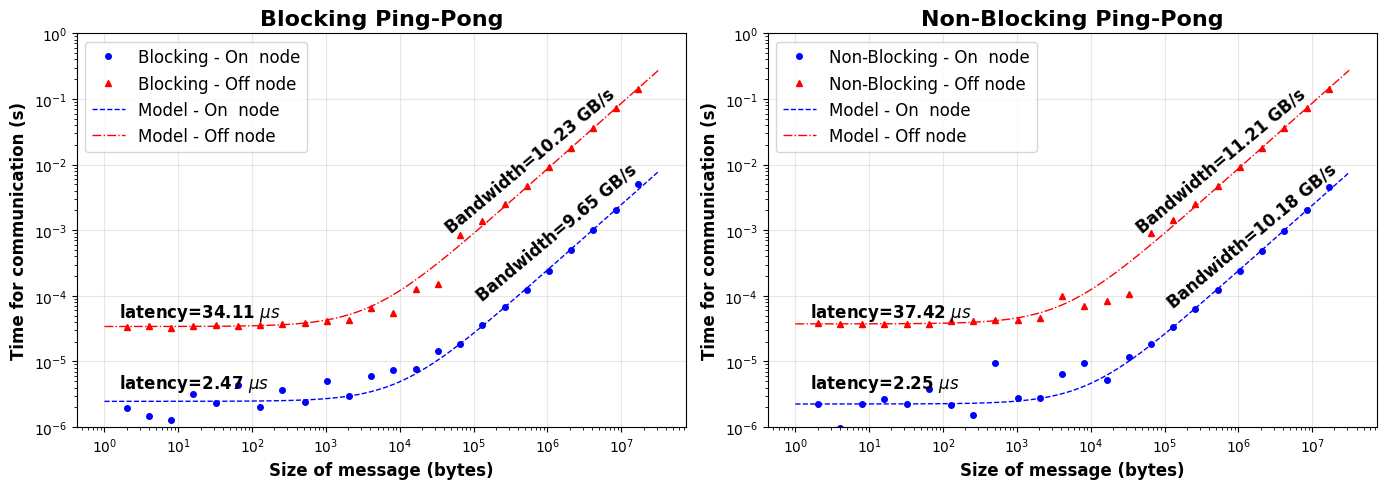

In [104]:
# First plotting for the Blocking and Non-Blocking cases.
SS = np.logspace(0, 7.5, 300)


fig, ax = plt.subplots(1, 2, figsize=(14, 5))
# First blocking ping pong
ax[0].loglog(Data['Size'], Data['PPBS_mean'], ls='', marker='o', markersize=4, color='b', label='Blocking - On  node')
ax[0].loglog(Data['Size'], Data['PPBD_mean'], ls='', marker='^', markersize=4, color='r', label='Blocking - Off node')
ax[0].loglog(SS, a_PPBS + b_PPBS * SS, ls='--', lw=1, color='b', label='Model - On  node')
ax[0].loglog(SS, a_PPBD + b_PPBD * SS, ls='-.', lw=1, color='r', label='Model - Off node')
ax[0].text(0.07, 0.14, f'latency={Lat_PPBS:.2f} $\mu s$', fontsize=12, fontweight='bold', color='k', 
             verticalalignment='top', horizontalalignment='left', transform=ax[0].transAxes)
ax[0].text(0.07, 0.32, f'latency={Lat_PPBD:.2f} $\mu s$', fontsize=12, fontweight='bold', color='k', 
             verticalalignment='top', horizontalalignment='left', transform=ax[0].transAxes)
ax[0].text(0.65, 0.68, f'Bandwidth={Band_PPBS:.2f} GB/s', fontsize=12, fontweight='bold', color='k', 
             verticalalignment='top', horizontalalignment='left', transform=ax[0].transAxes, rotation=40)
ax[0].text(0.60, 0.87, f'Bandwidth={Band_PPBD:.2f} GB/s', fontsize=12, fontweight='bold', color='k', 
             verticalalignment='top', horizontalalignment='left', transform=ax[0].transAxes, rotation=40)
ax[0].set_title('Blocking Ping-Pong', fontsize=16, fontweight='bold', color='k')
ax[0].set_ylabel('Time for communication (s)', fontsize=12, fontweight='bold', color='k')
ax[0].set_xlabel('Size of message (bytes)', fontsize=12, fontweight='bold', color='k')
ax[0].legend(fontsize=12, fancybox=True)
ax[0].grid('on', alpha=0.3)
ax[0].set_ylim([1e-6, 1e0])
# Now, non-blocking ping pong
ax[1].loglog(Data['Size'], Data['PPNS_mean'], ls='', marker='o', markersize=4, color='b', label='Non-Blocking - On  node')
ax[1].loglog(Data['Size'], Data['PPND_mean'], ls='', marker='^', markersize=4, color='r', label='Non-Blocking - Off node')
ax[1].loglog(SS, a_PPNS + b_PPNS * SS, ls='--', lw=1, color='b', label='Model - On  node')
ax[1].loglog(SS, a_PPND + b_PPND * SS, ls='-.', lw=1, color='r', label='Model - Off node')
ax[1].text(0.07, 0.14, f'latency={Lat_PPNS:.2f} $\mu s$', fontsize=12, fontweight='bold', color='k', 
             verticalalignment='top', horizontalalignment='left', transform=ax[1].transAxes)
ax[1].text(0.07, 0.32, f'latency={Lat_PPND:.2f} $\mu s$', fontsize=12, fontweight='bold', color='k', 
          verticalalignment='top', horizontalalignment='left', transform=ax[1].transAxes)
ax[1].text(0.65, 0.68, f'Bandwidth={Band_PPNS:.2f} GB/s', fontsize=12, fontweight='bold', color='k', 
             verticalalignment='top', horizontalalignment='left', transform=ax[1].transAxes, rotation=40)
ax[1].text(0.60, 0.87, f'Bandwidth={Band_PPND:.2f} GB/s', fontsize=12, fontweight='bold', color='k', 
             verticalalignment='top', horizontalalignment='left', transform=ax[1].transAxes, rotation=40)
ax[1].set_title('Non-Blocking Ping-Pong', fontsize=16, fontweight='bold', color='k')
ax[1].set_ylabel('Time for communication (s)', fontsize=12, fontweight='bold', color='k')
ax[1].set_xlabel('Size of message (bytes)', fontsize=12, fontweight='bold', color='k')
ax[1].legend(fontsize=12, fancybox=True)
ax[1].grid('on', alpha=0.3)
ax[1].set_ylim([1e-6, 1e0])

fig.tight_layout()
fig.savefig('Fig01_PingPong.png', format='png', dpi=800)

____


In [45]:
XX

array([1.00000000e+00, 1.17681195e+00, 1.38488637e+00, 1.62975083e+00,
       1.91791026e+00, 2.25701972e+00, 2.65608778e+00, 3.12571585e+00,
       3.67837977e+00, 4.32876128e+00, 5.09413801e+00, 5.99484250e+00,
       7.05480231e+00, 8.30217568e+00, 9.77009957e+00, 1.14975700e+01,
       1.35304777e+01, 1.59228279e+01, 1.87381742e+01, 2.20513074e+01,
       2.59502421e+01, 3.05385551e+01, 3.59381366e+01, 4.22924287e+01,
       4.97702356e+01, 5.85702082e+01, 6.89261210e+01, 8.11130831e+01,
       9.54548457e+01, 1.12332403e+02, 1.32194115e+02, 1.55567614e+02,
       1.83073828e+02, 2.15443469e+02, 2.53536449e+02, 2.98364724e+02,
       3.51119173e+02, 4.13201240e+02, 4.86260158e+02, 5.72236766e+02,
       6.73415066e+02, 7.92482898e+02, 9.32603347e+02, 1.09749877e+03,
       1.29154967e+03, 1.51991108e+03, 1.78864953e+03, 2.10490414e+03,
       2.47707636e+03, 2.91505306e+03, 3.43046929e+03, 4.03701726e+03,
       4.75081016e+03, 5.59081018e+03, 6.57933225e+03, 7.74263683e+03,
      

In [36]:
np.polyfit([0, 1, 3], [0, 1, 3], 1)

array([ 1.00000000e+00, -2.42685165e-16])